# Episode 05: Scoping of Proofs of concepts

TOdo 

In Episode 03, some potential problem solving strategies or heuristics. Fitted out with the  classes improved in Episode 04, let's try to solve the problem.

In this Episode will be focuse on exploring different technologies and check whether it is useful for solving this problem.

We willmost of time focus on 2x2 simple problems and assume that we know a solution to the problem. The latter will simplify the problem by allowing to check if the proposed solution aquals the expected solution instead of verifying if the solution works.

**Goals for this episode:**
- Try to solve the puzzle with classes defined in Episode 04
- List potential strategies or heuristics
- Evaluate by solving simple 2x2 problem with a known solution

# TODO group by categories 
?
optimizers
machine learning - NLP /transformers


use only known solutions and 2x2 here

# 1. Some initialisations

In [27]:
from episode04 import clues2x2, solution2x2, clues5x5s, solution5x5s
from episode04 import Puzzle, BoardMark, SolvedNonoGameEngine

import numpy as np

In [28]:
clues2x2

{'rows': [1, 2], 'cols': [2, 1]}

In [29]:
solution2x2

array([[1, 0],
       [1, 1]])

Now, let's loop over the problem space

# 6. Probabilistic approach

TODO

row 0 could be [x, o] or [o, x] 
=> probability of black is 0.5
col 0 could be [x, o] or [o, x] 
=> probability of black is 0.5
probability of top left cell to be black of probability of being black for row and black for col is the multiplication of probabilities

In [30]:
# create the game engine
puzzle2x2 = Puzzle(clues2x2)
game2x2 = SolvedNonoGameEngine(puzzle2x2, solution2x2, track=True)

In [31]:
probs2x2 = np.full((puzzle2x2.height, puzzle2x2.width), -1, dtype=float)
for i_row in range(len(puzzle2x2.given_clues['rows'])):
    sum_row = puzzle2x2.given_clues['rows'][i_row]
    for i_col in range(len(puzzle2x2.given_clues['cols'])):
        sum_col = puzzle2x2.given_clues['cols'][i_col]
        probs2x2[i_row, i_col] = (sum_row/puzzle2x2.width) * (sum_col/puzzle2x2.height)
        
probs2x2

array([[0.5 , 0.25],
       [1.  , 0.5 ]])

it is actually wrong from here. 0.5 is undecided

In [32]:
probs2x2 = np.full((puzzle2x2.height, puzzle2x2.width), -1, dtype=float)
for i_row in range(len(puzzle2x2.given_clues['rows'])):
    sum_row = puzzle2x2.given_clues['rows'][i_row]
    for i_col in range(len(puzzle2x2.given_clues['cols'])):
        sum_col = puzzle2x2.given_clues['cols'][i_col]
        probs2x2[i_row, i_col] = max((sum_row/puzzle2x2.width), (sum_col/puzzle2x2.height))
        
probs2x2

array([[1. , 0.5],
       [1. , 1. ]])

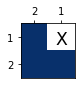

error_count:0


In [33]:
for row in range(puzzle2x2.height):
    for col in range(puzzle2x2.width):
        value = BoardMark.BLACK if probs2x2[row, col] > 0.5 else BoardMark.FILLER
        game2x2.play(row, col, value)

game2x2.show()
print(f"error_count:{game2x2.errors}")

# TODO pas possible

In [34]:
clues5x5s

{'rows': [1, 3, [1, 1], 3, 5], 'cols': [1, 4, [2, 2], 4, 1]}

In [35]:
# create the game engine
puzzle5x5s = Puzzle(clues5x5s)
game5x5s = SolvedNonoGameEngine(puzzle5x5s, solution5x5s, track=True)

In [36]:
sum_row_0 = sum(puzzle5x5s.norm_clues['rows'][0])
sum_row_0

1

In [37]:
sum_row_2 = sum(puzzle5x5s.norm_clues['rows'][2])
sum_row_2

2

In [38]:
probs5x5s = np.full((puzzle5x5s.height, puzzle5x5s.width), -1, dtype=float)
for i_row in range(len(puzzle5x5s.norm_clues['rows'])):
    sum_row = sum(puzzle5x5s.norm_clues['rows'][i_row])
    for i_col in range(len(puzzle5x5s.norm_clues['cols'])):
        sum_col = sum(puzzle5x5s.norm_clues['cols'][i_col])
        probs5x5s[i_row, i_col] = max((sum_row/puzzle5x5s.width), (sum_col/puzzle5x5s.height))
        
probs5x5s

array([[0.2, 0.8, 0.8, 0.8, 0.2],
       [0.6, 0.8, 0.8, 0.8, 0.6],
       [0.4, 0.8, 0.8, 0.8, 0.4],
       [0.6, 0.8, 0.8, 0.8, 0.6],
       [1. , 1. , 1. , 1. , 1. ]])

In [39]:
probs5x5s_alt = np.full((puzzle5x5s.height, puzzle5x5s.width), -1, dtype=float)
for i in range(len(solution5x5s.flat[:])):
        probs5x5s_alt.flat[i] =  0.75 if solution5x5s.flat[i] == 1 else 0.25
        
probs5x5s_alt

array([[0.25, 0.25, 0.75, 0.25, 0.25],
       [0.25, 0.75, 0.75, 0.75, 0.25],
       [0.25, 0.75, 0.25, 0.75, 0.25],
       [0.25, 0.75, 0.75, 0.75, 0.25],
       [0.75, 0.75, 0.75, 0.75, 0.75]])

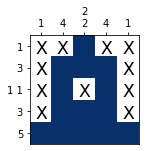

error_count:0


In [40]:
probs = probs5x5s_alt
for row in range(puzzle5x5s.height):
    for col in range(puzzle5x5s.width):
        value = BoardMark.BLACK if probs[row, col] > 0.5 else BoardMark.FILLER
        game5x5s.play(row, col, value)

game5x5s.show()
print(f"error_count:{game5x5s.errors}")

MC

In [41]:
import random

random.uniform(0,1)

0.3139117989321982

In [42]:
p = 0.75
for i in range(10):
    value = BoardMark.BLACK if random.uniform(0,1)<=p else BoardMark.FILLER
    print(value)

BoardMark.BLACK
BoardMark.BLACK
BoardMark.BLACK
BoardMark.BLACK
BoardMark.BLACK
BoardMark.FILLER
BoardMark.FILLER
BoardMark.BLACK
BoardMark.BLACK
BoardMark.BLACK


[1, 0, 1, 1]


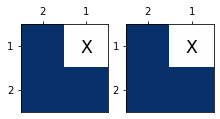

In [43]:
# create the game engine
puzzle2x2 = Puzzle(clues2x2)
game2x2 = SolvedNonoGameEngine(puzzle2x2, solution2x2, track=True)

def mc_sampler():
    X = []
    for row in range(puzzle2x2.height):
        for col in range(puzzle2x2.width):
            is_black = np.random.normal(probs2x2[row, col], 0.1) >= 0.5 
            #is_black = random.uniform(probs2x2[row, col],1) >= 0.5 
            value = BoardMark.BLACK.value if is_black else BoardMark.FILLER.value
            X.append(value)
    return X

solved = False
sample = None
samples = []
while(not solved):
    sample =  mc_sampler()
    if not sample in samples:
        samples.append(sample)
        print(sample)
        game2x2.submit(sample)
        solved = game2x2.is_solved()

game2x2.submit(sample)
game2x2.show_all()

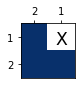

In [44]:
game2x2.submit(sample)
game2x2.show()

In [45]:
np.random.normal(0.8,0.1)

0.7898014101092078

[0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0]
[0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0]
[0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1]
[0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]
[0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1]
[0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1]
[0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1]
[0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1]


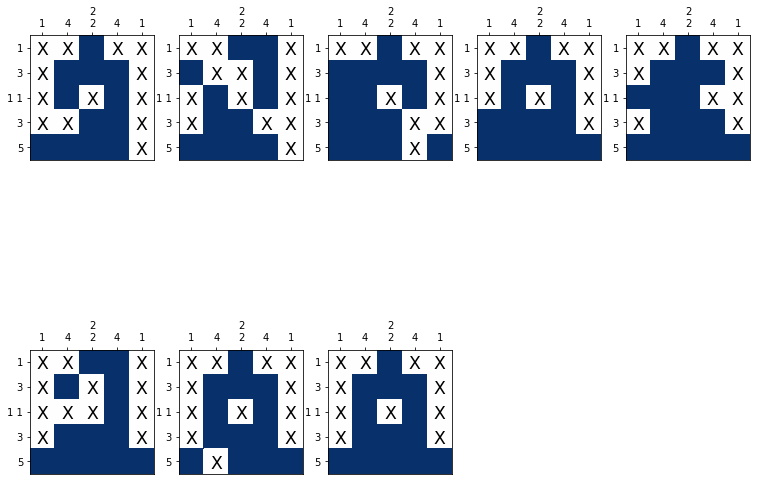

In [51]:
# create the game engine
puzzle5x5s = Puzzle(clues5x5s)
game5x5s = SolvedNonoGameEngine(puzzle5x5s, solution5x5s, track=True)
probs = probs5x5s_alt

def mc_sampler():
    X = []
    for row in range(puzzle5x5s.height):
        for col in range(puzzle5x5s.width):
            is_black = np.random.normal(probs[row, col], 0.2) >= 0.5 
            value = BoardMark.BLACK.value if is_black else BoardMark.FILLER.value
            X.append(value)
    return X

solved = False
sample = None
samples = []
i = 0
while(not solved and i<50):
    sample =  mc_sampler()
    if not sample in samples:
        samples.append(sample)
        print(sample)
        game5x5s.submit(sample)
        solved = game5x5s.is_solved()
    i += 1

game5x5s.show_all()

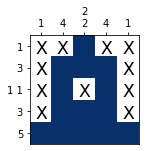

In [52]:
game5x5s.submit(sample)
game5x5s.show()

In [49]:
probs5x5s_alt = np.full((puzzle5x5s.height, puzzle5x5s.width), -1, dtype=float)
for i in range(len(solution5x5s.flat[:])):
        probs5x5s_alt.flat[i] =  0.75 if solution5x5s.flat[i] == 1 else 0.25
        
probs5x5s_alt

array([[0.25, 0.25, 0.75, 0.25, 0.25],
       [0.25, 0.75, 0.75, 0.75, 0.25],
       [0.25, 0.75, 0.25, 0.75, 0.25],
       [0.25, 0.75, 0.75, 0.75, 0.25],
       [0.75, 0.75, 0.75, 0.75, 0.75]])

# TODO compute probs

In [ ]:
## Wrap up

compute probs / update probs

## 5.3. Wrap up

Depends on the availability of useful probabilities. In the real work tehy may come from statistiics computed on the past behavior.

What works:
- can find an acceptable "not so bad" solution is the problem is not strictly defined where another algorithm would block on the lack of deterministic solution

Limitation:
- requires that a try and error process is acceptable

The main idea is implemented. Need some improvement to running sum with split block and tests against the 5x5s game


- Ideation: 30mn - classical paradigm 
- Design: 3h - I struggled with probility defintion. My fiirst asumption was wrong. I went down to an approximation
- Implementation: 5h - I tried different ways of using the statistics